In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/school/ENIGH/src/')
import sys; sys.path.append('/home/mitch/util/python')

In [137]:
processed = '/home/mitch/Dropbox/data/mexico_enigh/processed2/'

figs    = '/home/mitch/github/ENIGH/fig/'
dicts   = '/home/mitch/github/ENIGH/dicts/'

In [138]:
df = pd.read_csv(processed + 'data.csv')
df

,income_salary,consumption_total,income_business,hh_size,consumption_food,consumption_health,income_other,hhid,location,income_current,...,has_income_interest_fixed_investments,has_income_interest_loans_to_third_parties,has_income_interest_savings_accounts,has_income_interest_shares_bonds,has_income_land_landrental,has_income_realestate_mortgage,has_income_rental_houses_buildings_other_realestate,has_income_rental_trademarks_patents_copyrights,has_income_securities_bonds,has_income_withdrawal_savings
0,36.826188,43.547649,0.0,9,5.867128,0.059672,0.0,19940110010,1001,42.056359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.730475,28.312280,0.0,5,11.628994,0.000000,0.0,19940110020,1001,29.782054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.055685,44.265249,0.0,3,17.903154,0.085246,0.0,19940110030,1001,57.175044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.429462,62.225261,0.0,6,12.873225,0.356327,0.0,19940110040,1001,69.337660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84.700233,70.674672,0.0,5,14.379194,0.000000,0.0,19940110050,1001,102.915079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26852,10.673609,13.054307,0.0,7,3.824656,0.201993,0.0,19963399040,15033,14.379203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26853,14.097219,16.941380,0.0,6,6.293421,0.000000,0.0,19963399050,15033,18.420413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26854,49.622210,89.016606,0.0,3,18.984631,0.950153,0.0,19963399060,15109,83.558445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26855,14.097219,33.806916,0.0,6,9.492550,0.000000,0.0,19963399500,15058,29.458018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df['post'] = df['Y'] == 1996
income = ['income_salary', 'income_business', 'income_transfers']
df['income'] = df[income].sum(axis=1)
df['log_income'] = np.log(df['income'])

consumption = ['consumption_food', 'consumption_personal', 'consumption_clothing']
df['consumption'] = df[consumption].sum(axis=1)
df['log_consumption'] = np.log(df['consumption'])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [140]:
df = (df.query('income > 0')
      .query('consumption > 0')
      .query('age >= 25')
      .query('age <= 60'))
#df = df[df['location_size'].apply(lambda x : x not in [4.0, 5.0])]

In [141]:
from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['income'], df['weight']).quantile(0.995).iloc[0]
df = df.query('income < @q_995')

from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['consumption'], df['weight']).quantile(0.995).iloc[0]
df = df.query('consumption < @q_995')

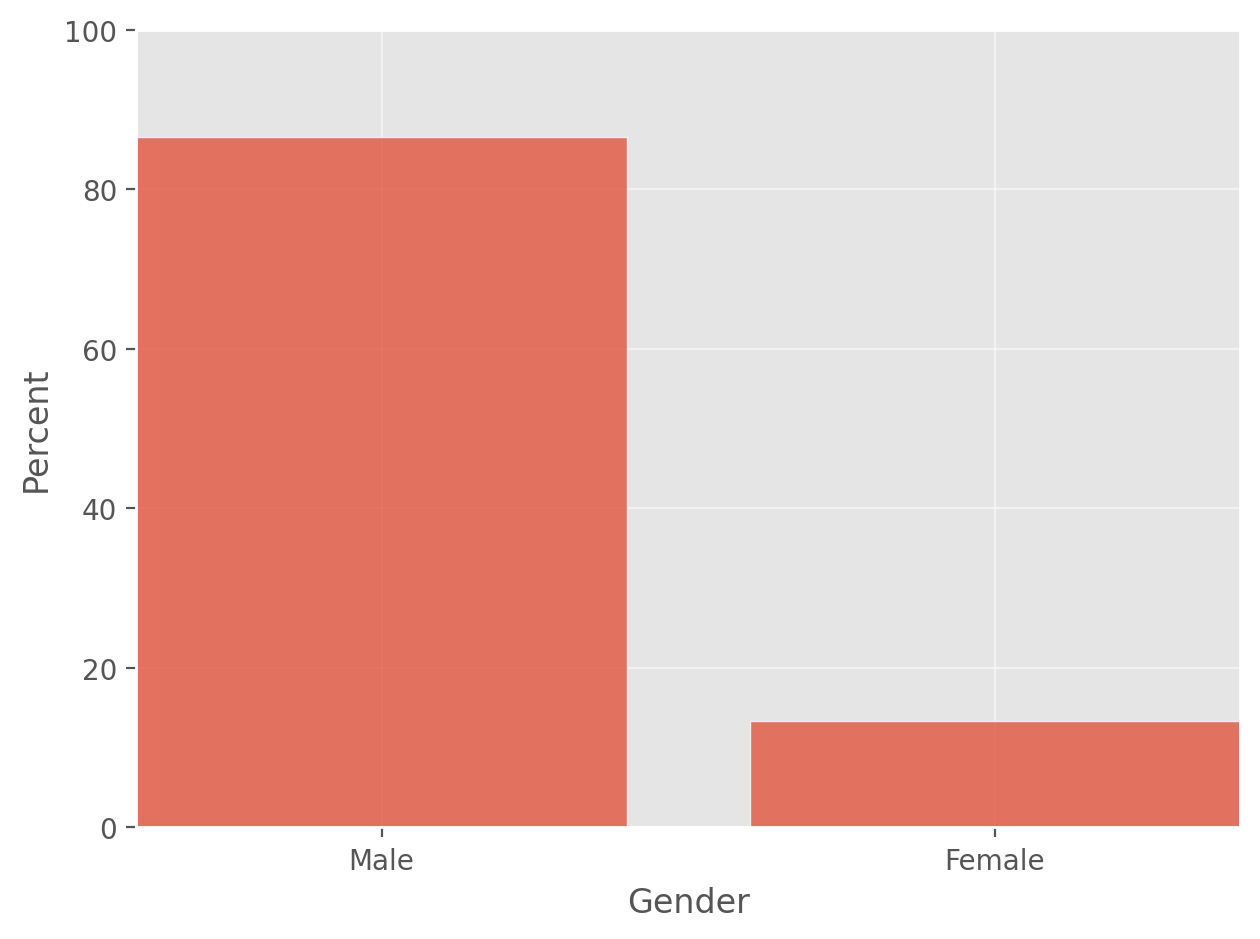

In [142]:
plt.clf()
ax = sns.histplot(df, x='sex', 
             stat='percent', 
             weights='weight',
             shrink=0.8)
ax.set_xlabel('Gender')
ax.set_ylim(0, 100)
plt.title('Gender of Household Head')
plt.show()

<ipython-input-143-5a952a3a8603>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'Medium', 'High'])


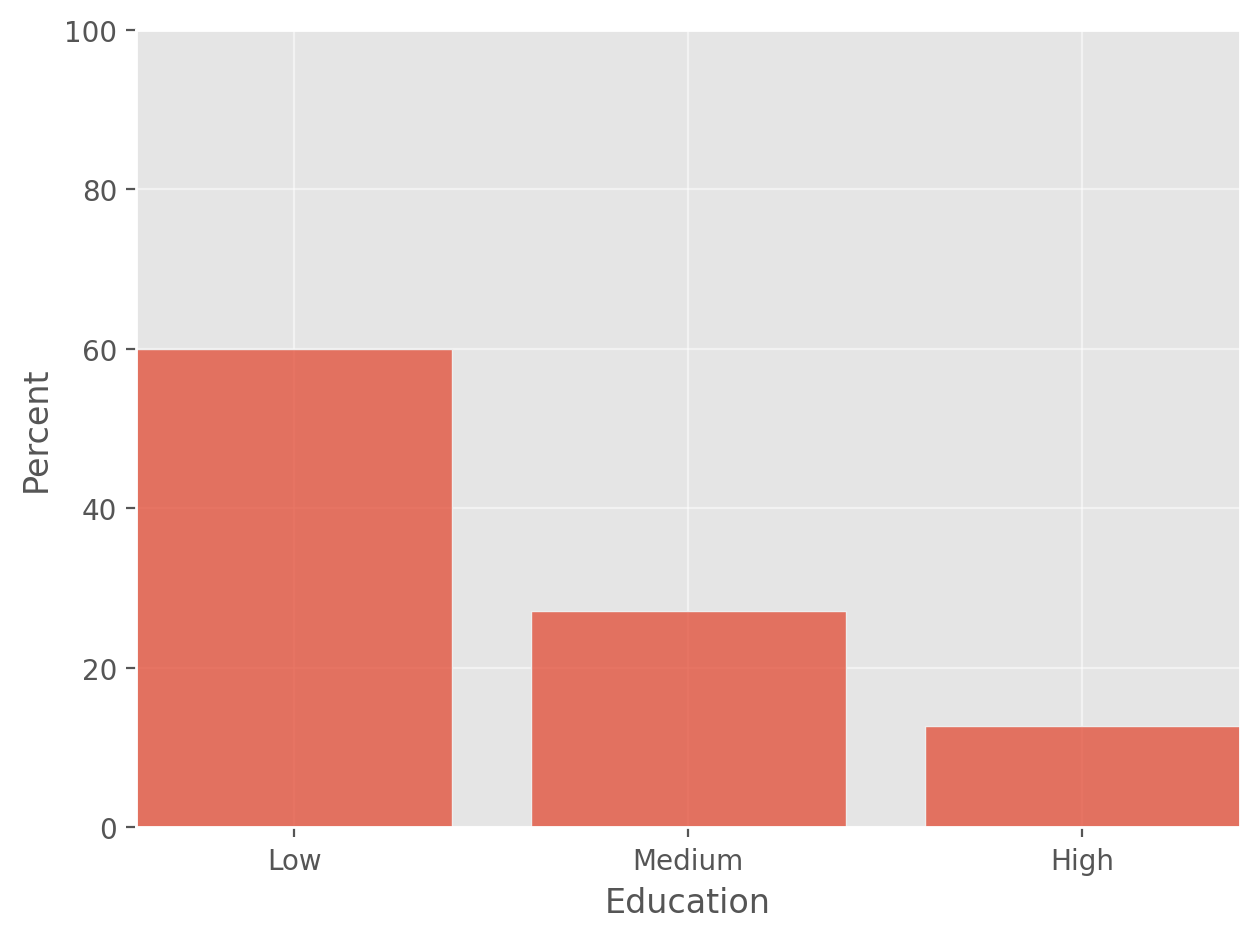

In [143]:
df['education'] = pd.Categorical(df['education'], ['low', 'medium', 'high'])
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight',
                  shrink=0.8,
                  stat='percent'
                  )
ax.set_xlabel('Education')
ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

plt.show()

In [144]:
aux = df.groupby(['sex', 'education'])['weight'].sum().reset_index()
norm = aux.groupby('sex')['weight'].transform('sum')
norm

aux['weight'] = 100 * aux['weight'] / norm
aux

,sex,education,weight
0,Female,low,68.762258
1,Female,medium,22.782768
2,Female,high,8.454974
3,Male,low,58.701302
4,Male,medium,27.860825
5,Male,high,13.437873


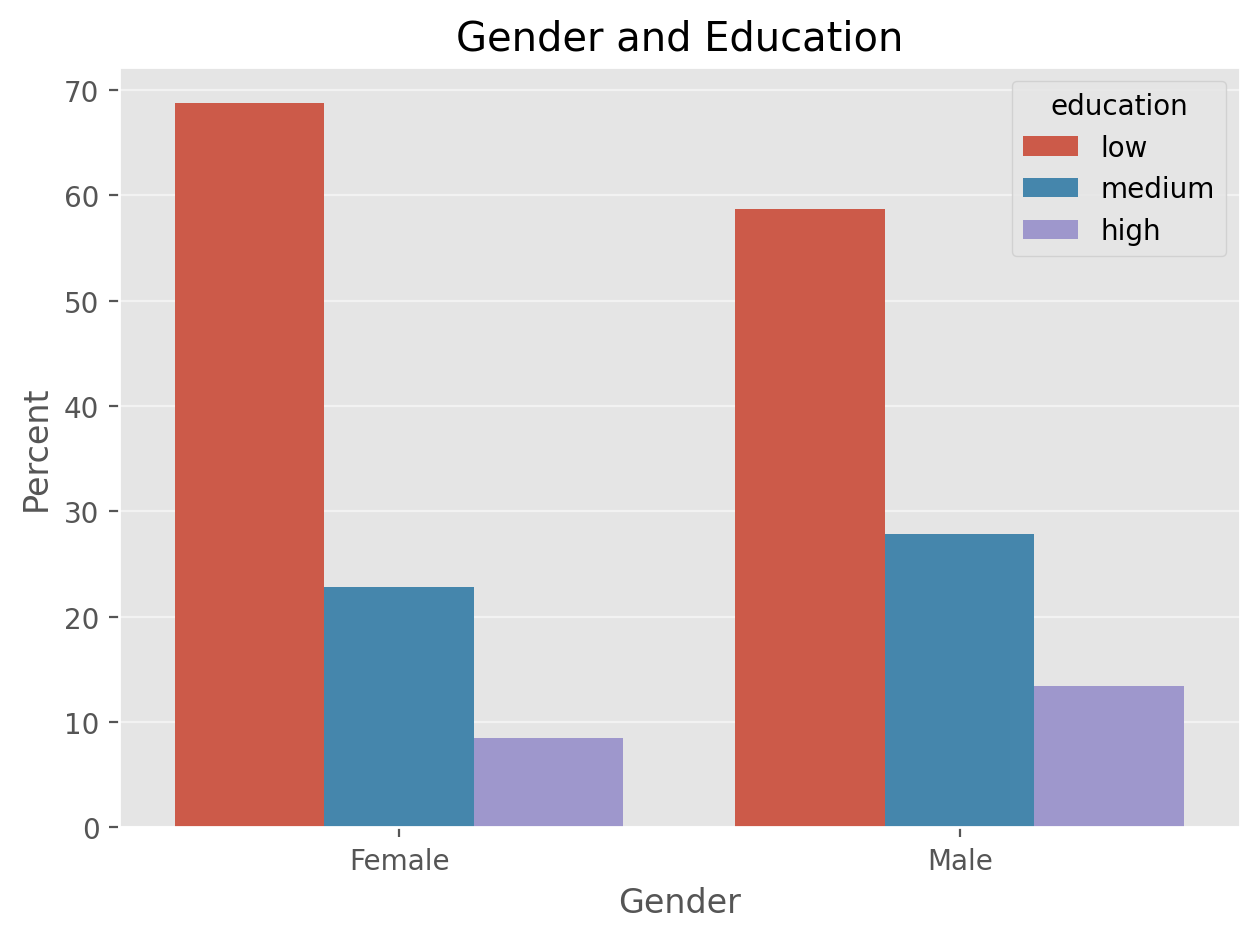

In [146]:
plt.clf()
sns.barplot(aux, x='sex', y='weight', hue='education')

plt.xlabel('Gender')
plt.ylabel('Percent')

plt.title('Gender and Education')
plt.show()

In [123]:
aux = df.groupby(['location_size', 'education'])['weight'].sum().reset_index()
norm = aux.groupby('location_size')['weight'].transform('sum')
norm

aux['weight'] = 100 * aux['weight'] / norm
aux

,location_size,education,weight
0,1,low,44.830656
1,1,medium,35.243124
2,1,high,19.926220
3,2,low,55.724462
4,2,medium,33.352878
5,2,high,10.922660
6,3,low,74.526056
7,3,medium,19.759194
8,3,high,5.714750
9,4,low,89.019059


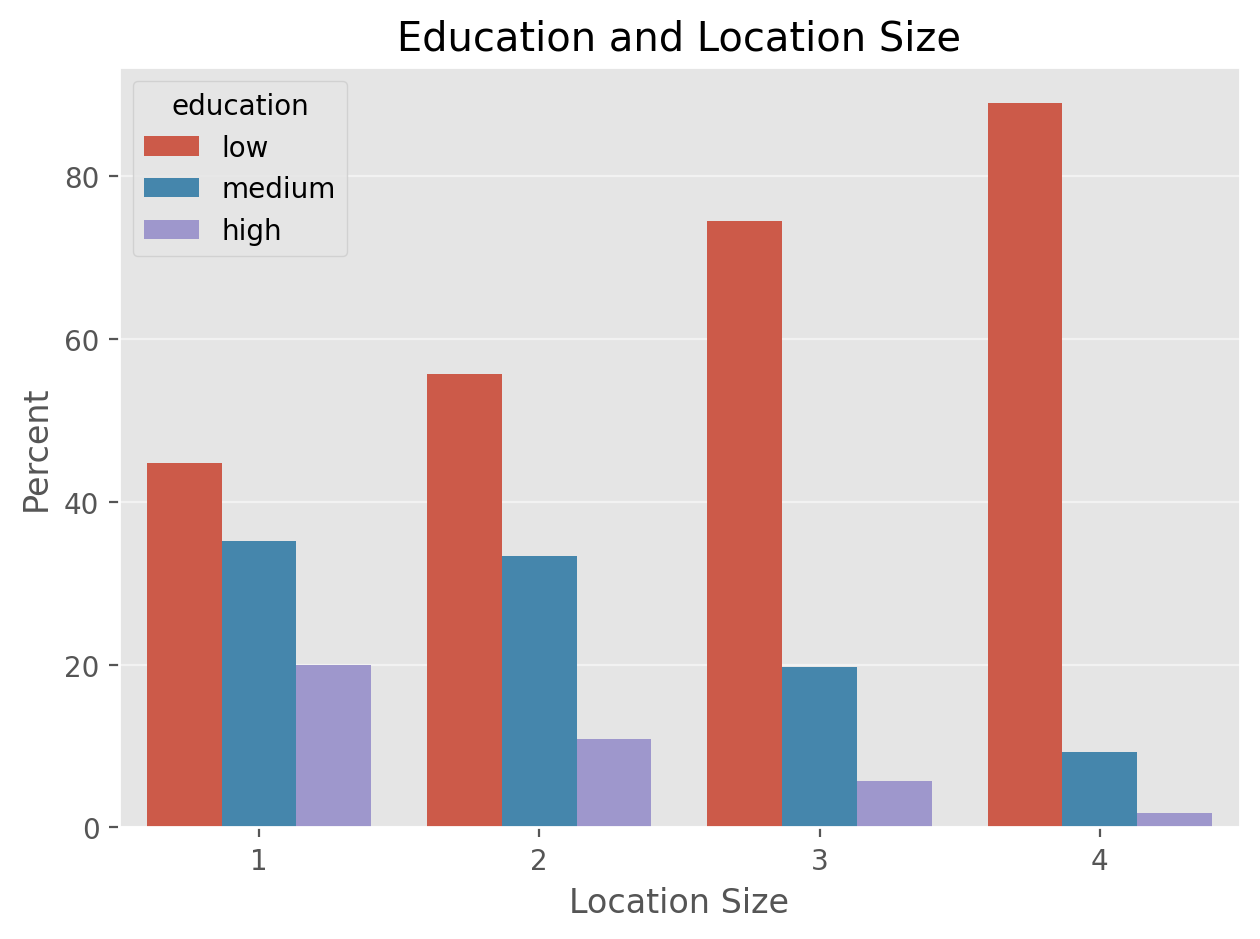

In [134]:
plt.clf()
sns.barplot(aux, x='location_size', y='weight', hue='education')

plt.xlabel('Location Size')
plt.ylabel('Percent')

plt.title('Education and Location Size')
plt.show()

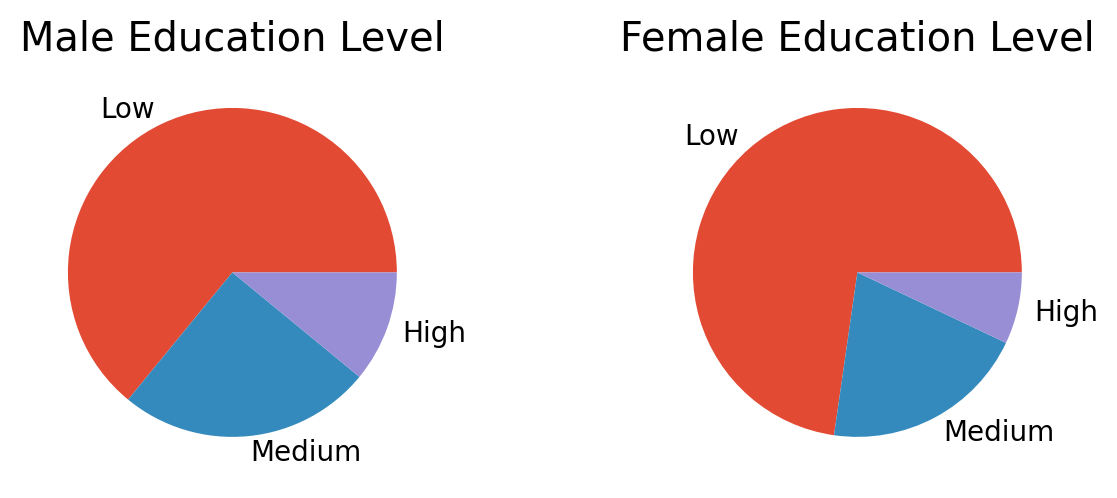

In [125]:
plt.clf()

plt.subplot(221)
male = df.query("sex == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index])
plt.title('Male Education Level')

plt.subplot(222)
female = df.query("sex == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index])
plt.title('Female Education Level')

plt.show()

# Income

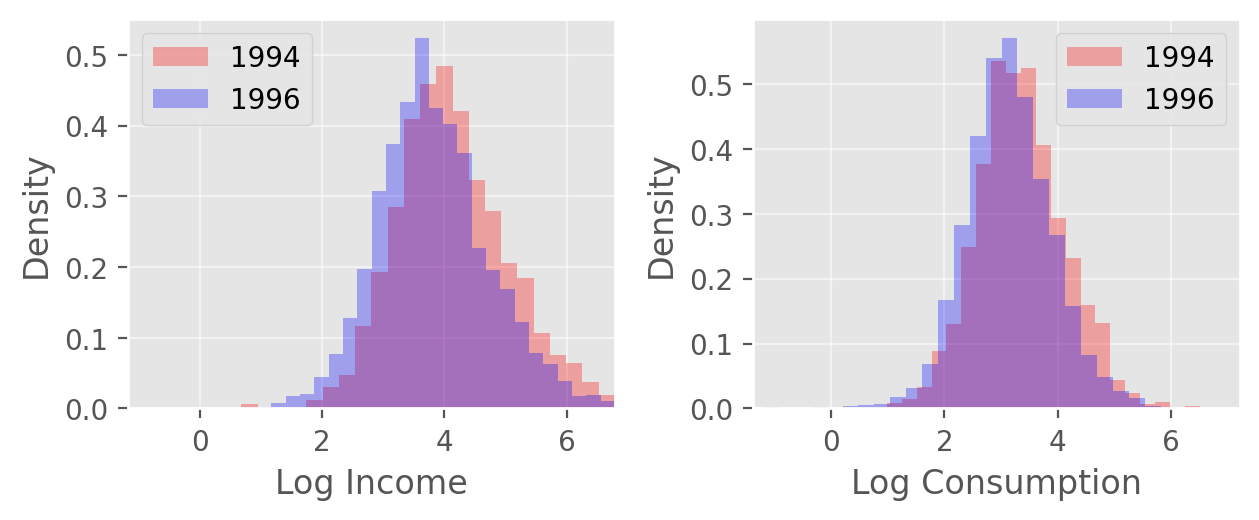

In [68]:
plt.clf()

df94 = df.query('Y == 1994')
df96 = df.query('Y == 1996')

plt.subplot(221)
plt.hist(df94['income'].transform(np.log), density=True,
         weights=df94['weight'], bins=30,
         color='red', alpha=0.3, label='1994')
plt.hist(df96['income'].transform(np.log), density=True,
         weights=df96['weight'], bins=30,
         color='blue', alpha=0.3, label='1996')

plt.xlabel('Log Income')
plt.ylabel('Density')

plt.legend()

plt.subplot(222)
plt.hist(df94['consumption'].transform(np.log), density=True,
         weights=df94['weight'], bins=30,
         color='red', alpha=0.3, label='1994')
plt.hist(df96['consumption'].transform(np.log), density=True,
         weights=df96['weight'], bins=30,
         color='blue', alpha=0.3, label='1996')

plt.xlabel('Log Consumption')
plt.ylabel('Density')

plt.legend()
plt.show()

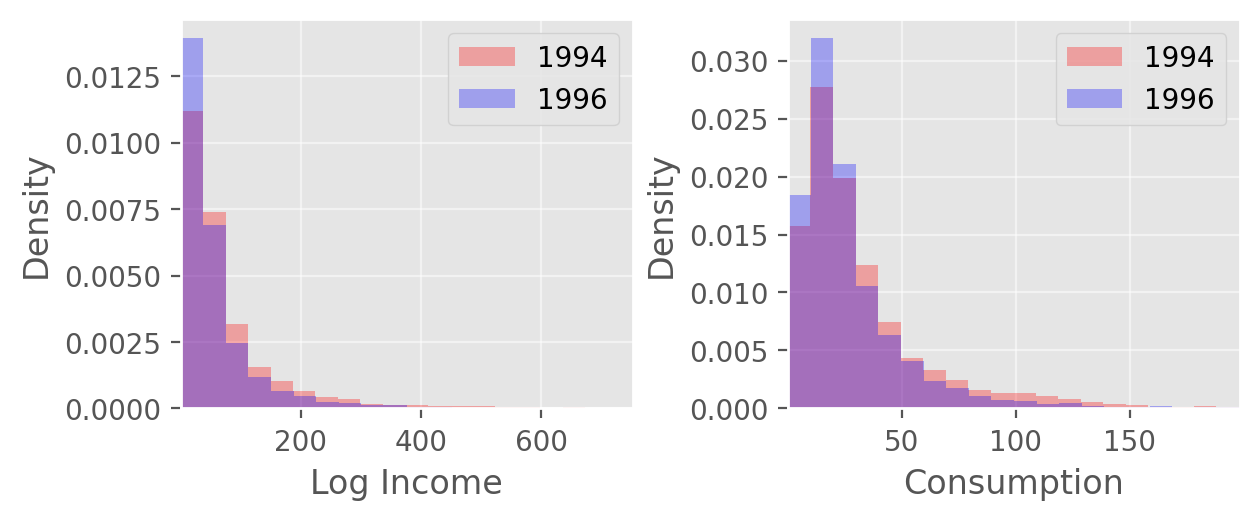

In [126]:
plt.clf()

nbin = 20

df94 = df.query('Y == 1994')
df96 = df.query('Y == 1996')

plt.subplot(221)
plt.hist(df94['income'], density=True,
         weights=df94['weight'], bins=nbin,
         color='red', alpha=0.3, label='1994')
plt.hist(df96['income'], density=True,
         weights=df96['weight'], bins=nbin,
         color='blue', alpha=0.3, label='1996')

plt.xlabel('Income')
plt.ylabel('Density')

plt.legend()

plt.subplot(222)
plt.hist(df94['consumption'], density=True,
         weights=df94['weight'], bins=nbin,
         color='red', alpha=0.3, label='1994')
plt.hist(df96['consumption'], density=True,
         weights=df96['weight'], bins=nbin,
         color='blue', alpha=0.3, label='1996')

plt.xlabel('Consumption')
plt.ylabel('Density')

plt.legend()
plt.show()

<Figure size 1280x960 with 0 Axes>

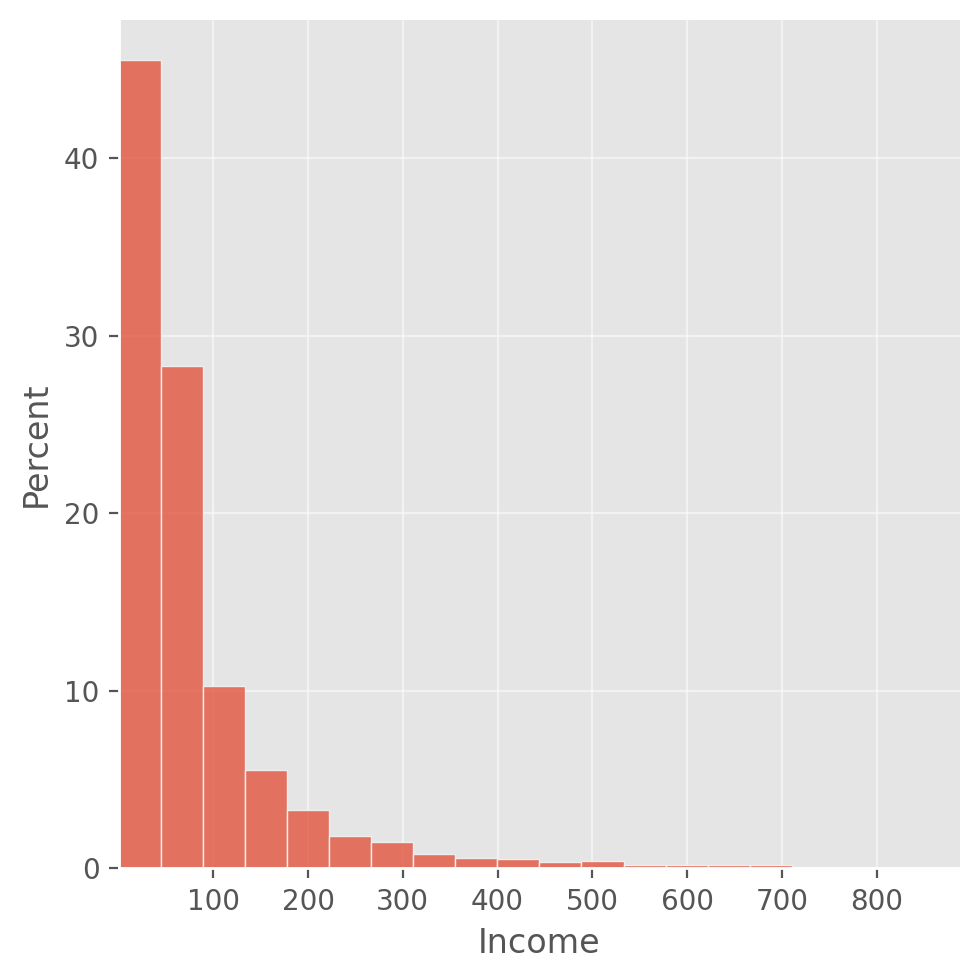

In [65]:
plt.clf()
sns.displot(df,
            x='income',
            weights='weight',
            stat='percent',
            bins=20
            )
plt.xlabel('Income')
plt.show()

<Figure size 1280x960 with 0 Axes>

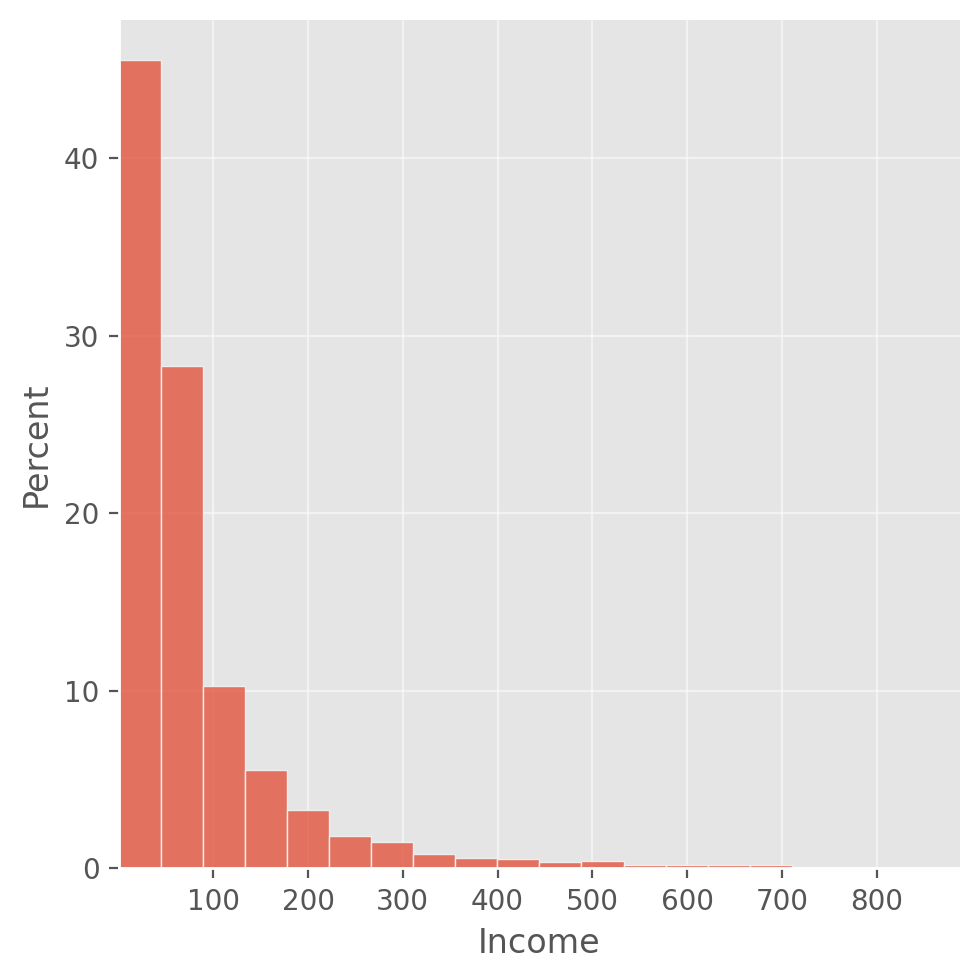

In [66]:
plt.clf()
sns.displot(df.query('income > 0'),
            x='income',
            weights='weight',
            stat='percent', 
            bins=20)
plt.xlabel('Income')
plt.show()

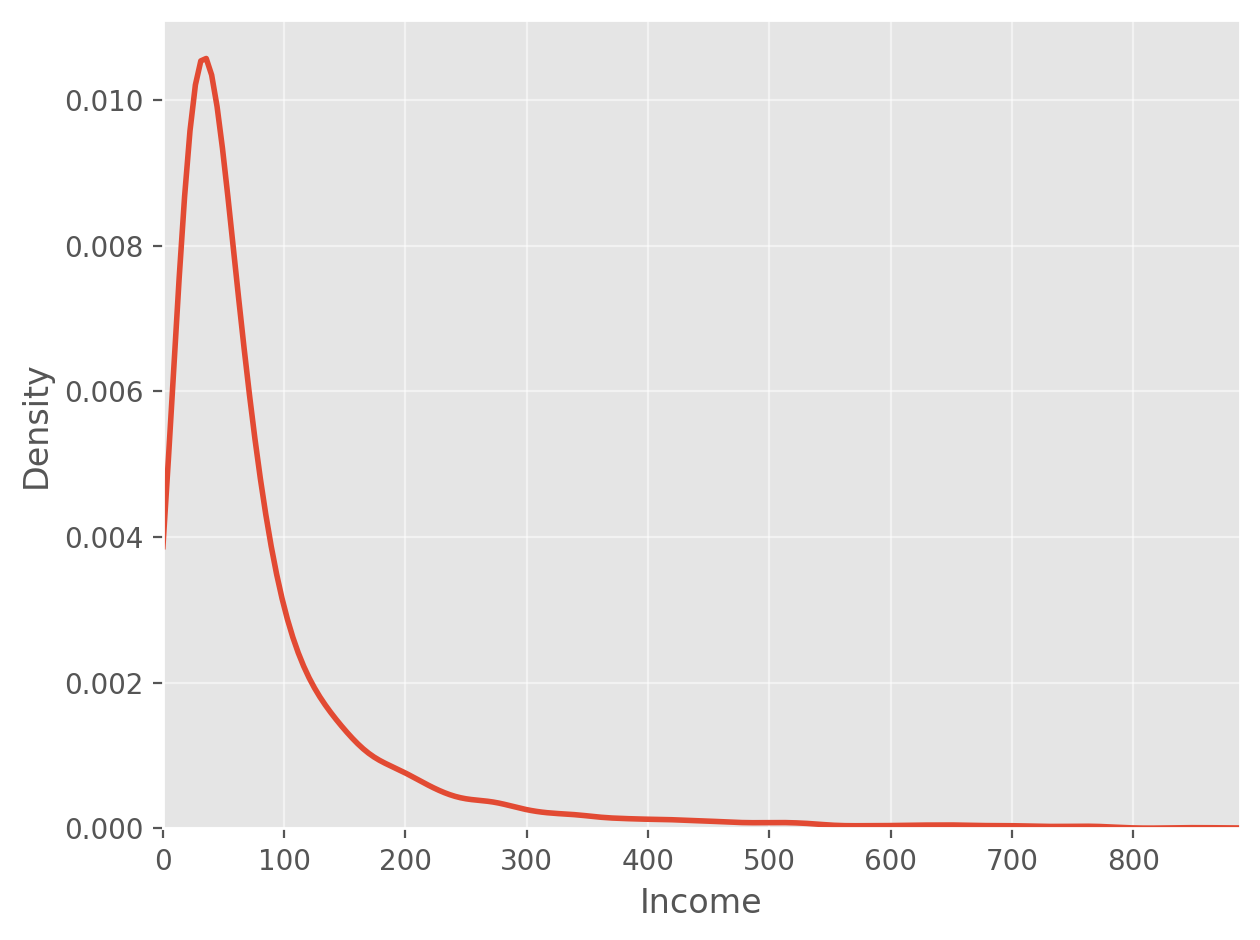

In [67]:
plt.clf()
sns.kdeplot(df.query('income > 0'),
            x='income',
            weights='weight', 
            clip=(0.00, df.income.max()))
plt.xlabel('Income')
plt.show()

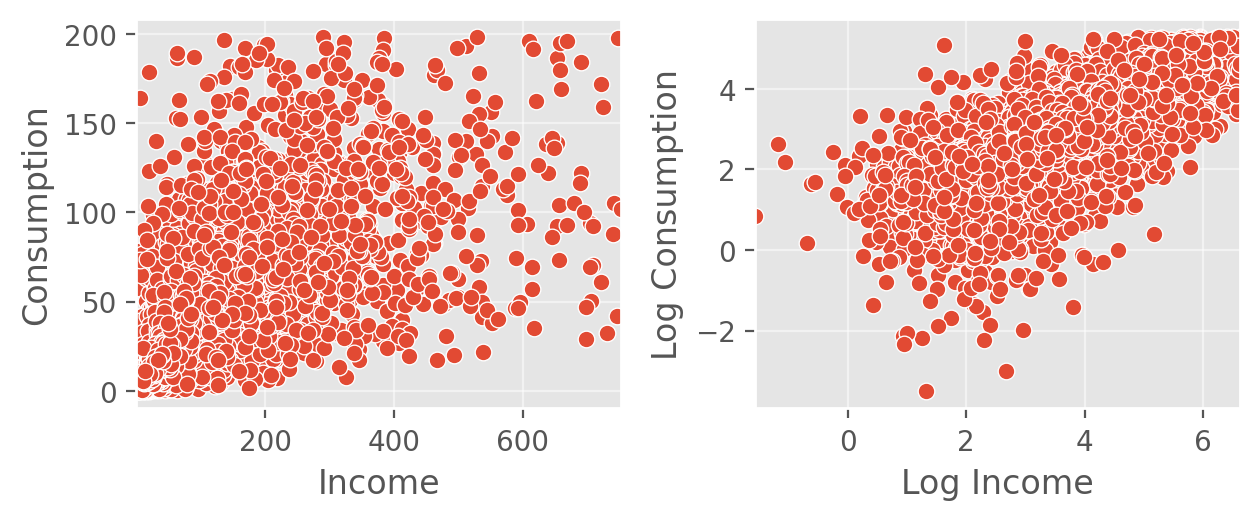

In [133]:
plt.clf()
plt.subplot(221)
sns.scatterplot(df, x='income', y='consumption')
plt.xlabel('Income')
plt.ylabel('Consumption')

plt.subplot(222)
sns.scatterplot(df, x='log_income', y='log_consumption')
plt.xlabel('Log Income')
plt.ylabel('Log Consumption')

plt.show()

# Age

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


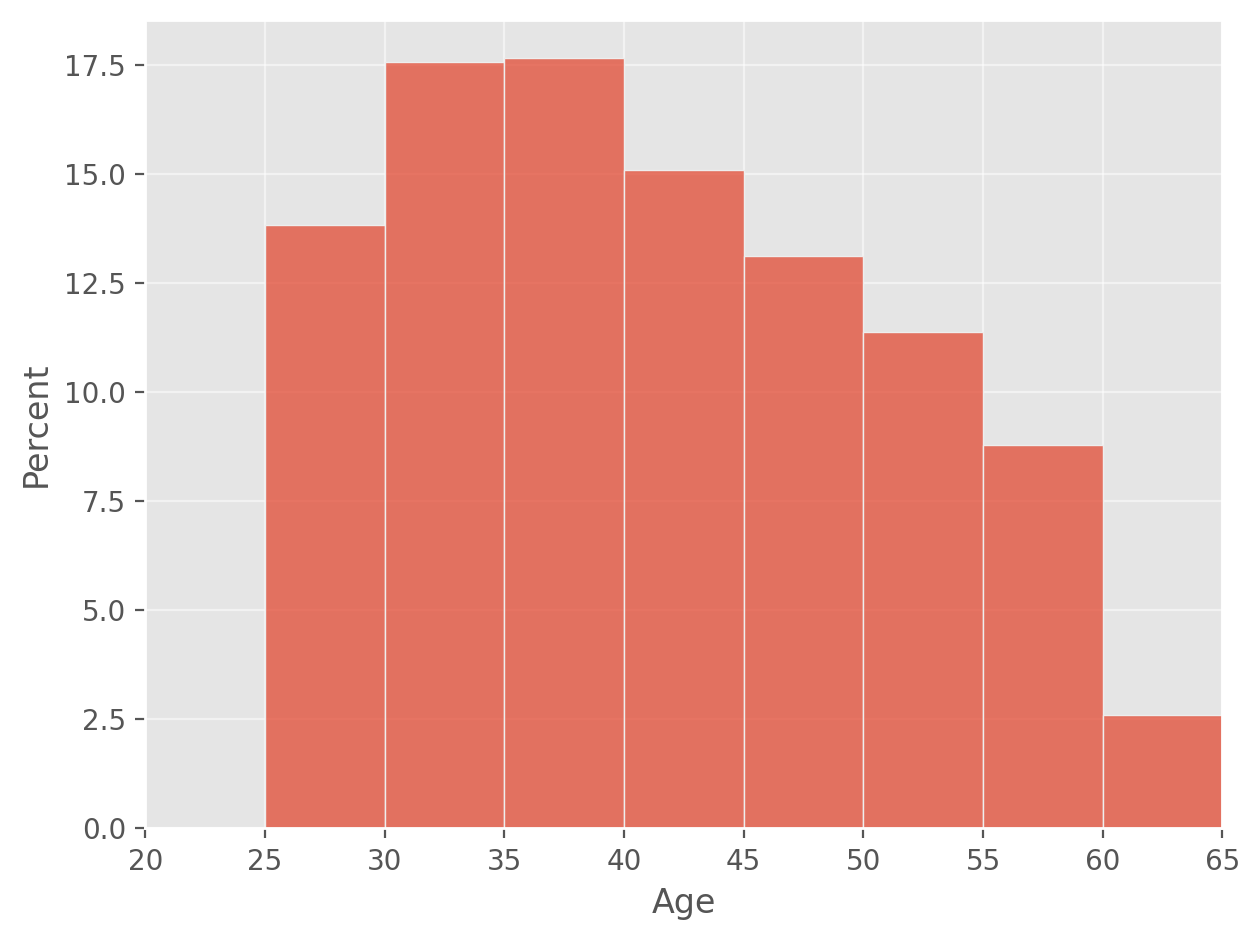

In [108]:
agebins = np.arange(20,70, 5)
plt.clf()
ax = sns.histplot(df, x = 'age', weights='weight', 
             bins=agebins,
             stat='percent')
ax.set_xlabel('Age')
plt.show()

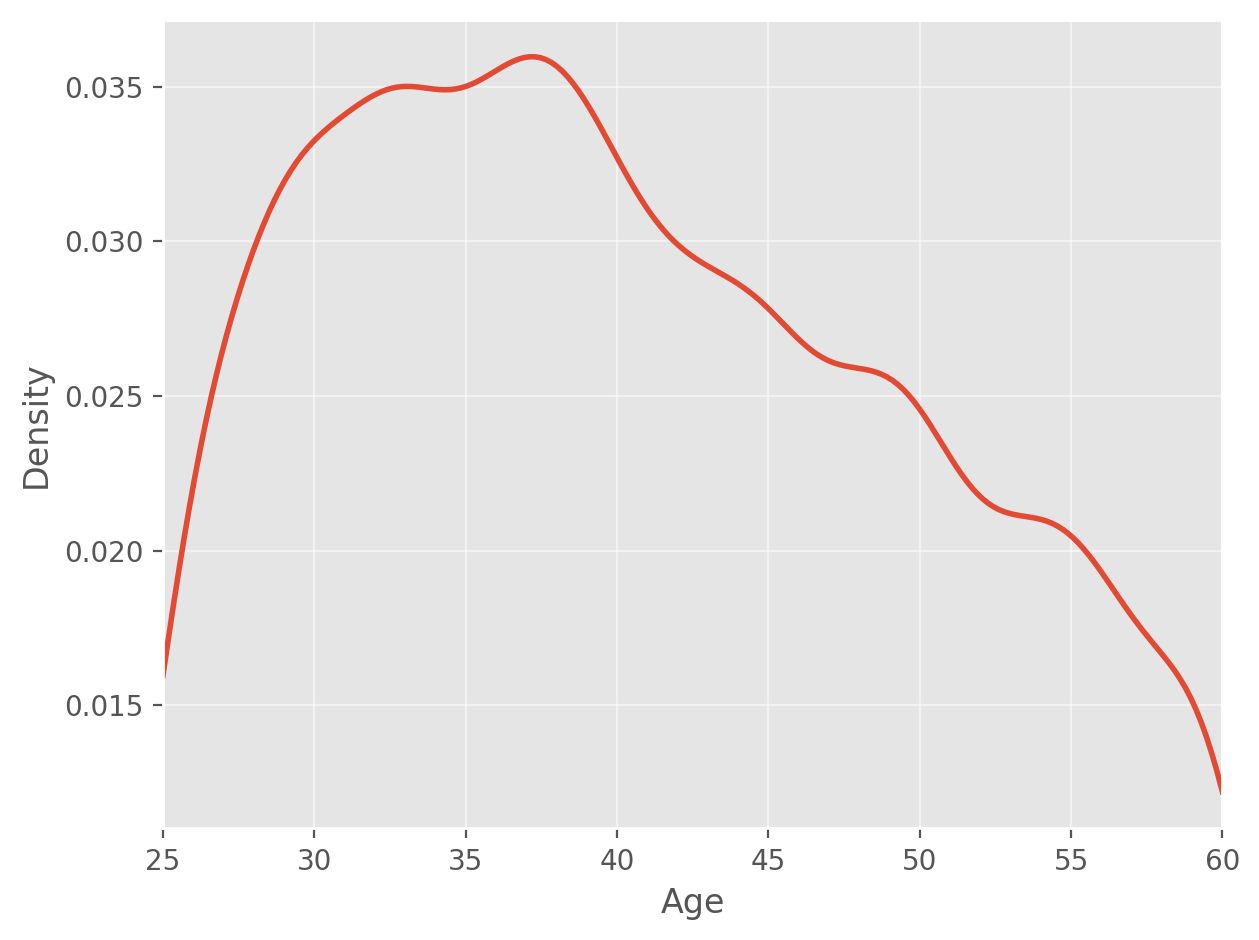

In [109]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.show()